In [1]:
%matplotlib inline

from google.colab import files, drive    # upload
import numpy as np                       # mathematical calculations
from io import BytesIO                   # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
from scipy import signal
import plotly.express as px 
import cv2
drive.mount('drive')

Mounted at drive


In [35]:
COLOR = 'gray'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['font.weight'] = 'light'

(950, 1200, 3)


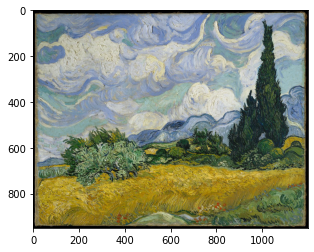

In [2]:
img = Image.open("/content/drive/MyDrive/coding/Image Blending/landscape.jpeg")
im = np.array(img)
plt.imshow(im)
print(im.shape)

In [3]:
apple1 = Image.open("/content/drive/MyDrive/coding/Image Blending/apple.jpeg")
orange1 = Image.open("/content/drive/MyDrive/coding/Image Blending/orange.jpeg")
apple = np.array(apple1)[1:,37:-37, :]
orange = np.array(orange1)[1:, 37:-37, :]
print(apple.shape, orange.shape)

(190, 190, 3) (190, 190, 3)


(474, 474, 3)


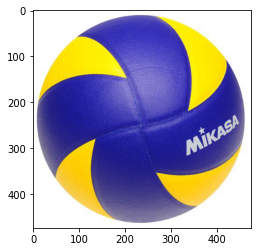

In [4]:
volleyball = Image.open("/content/drive/MyDrive/coding/Image Blending/volleyball.jfif")
vb = np.array(volleyball)
plt.imshow(vb)
print(vb.shape)

(474, 474, 3)


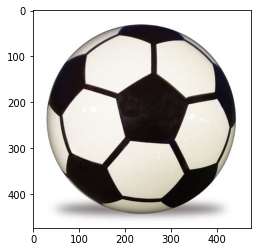

In [5]:
soccer = Image.open("/content/drive/MyDrive/coding/Image Blending/soccer.jfif")
sb = np.array(soccer)
plt.imshow(sb)
print(sb.shape)

(-0.5, 473.5, 473.5, -0.5)

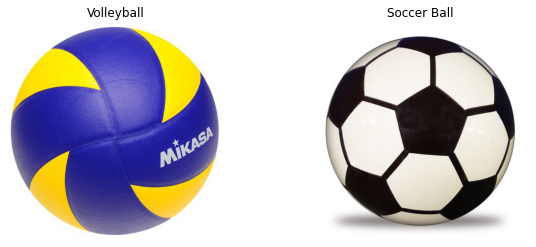

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4])
ax1.set_title("Volleyball")
ax2.set_title("Soccer Ball")

im1 = ax1.imshow(vb)
im2 = ax2.imshow(sb)

ax1.axis("off")
ax2.axis("off")

#9 Levels Needed

(190, 190, 3)


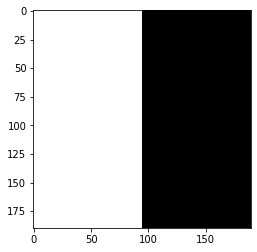

In [7]:
mask = np.zeros(apple.shape, dtype = np.float32)
mask[:, :apple.shape[1]//2, :] = 1
plt.imshow(mask) 
print(mask.shape)

In [8]:
def upsample(im, shape):
  test = np.zeros(shape, np.float32)
  test[::2, ::2, :] = im
  if test.shape[0] % 2 == 0:
    height = test.shape[0] - 1
  else:
    height = test.shape[0] 
  if test.shape[1] % 2 == 0:
    width = test.shape[1] - 1
  else:
    width = test.shape[1] 
  for i in range(0, height, 1):
    for j in range(0, width, 1):
      if i % 2 == 0 and j % 2 != 0:
        test[i, j] = 0.5 * (test[i, j - 1] + test[i, j + 1])
      if i % 2 != 0 and j % 2 == 0:
        test[i, j] = 0.5 * (test[i - 1, j] + test[i + 1, j])
      if i % 2 != 0 and j % 2 != 0:
        test[i, j] = 0.25 * (test[i - 1, j - 1] + test[i - 1, j + 1] + test[i + 1, j + 1] + test[i + 1, j - 1])
  if width < test.shape[1]:
    test[:, width, :] = test[:, width - 1, :]
  if height < test.shape[0]:
    test[height, :, :] = test[height - 1, :, :]

  if width < test.shape[1] and height < test.shape[0]:
    test[height, width, :] = (test[height - 1, width, :] + test[height, width - 1, :])/2

  return(test)

In [9]:
kern = np.ones((3, 3))/9
def downsample(img, n):
  if n == 0:
    return img
  else:
    return downsample(img[::2, ::2, :], n - 1)
def convolve_rgb(im, kern):
  result = np.zeros(im.shape)
  for i in range(3):
    result[:, :, i] = signal.convolve2d(im[:, :, i], kern, mode = "same")
  return result
def convert(im):
  print(im.max())
  return np.uint8(255 * im/im.max())
def pyramid_level(im, level, kern=kern):
  if level == 0:
    return im
  else:
    new = convolve_rgb(im, kern)
    down = downsample(new, 1)
    return pyramid_level(down, level - 1)
new_im = downsample(im, 2)
result = convert(convolve_rgb(im, kern))
level4 = convert(pyramid_level(im, 3))

249.77777777777774
224.3168724279835


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255.0


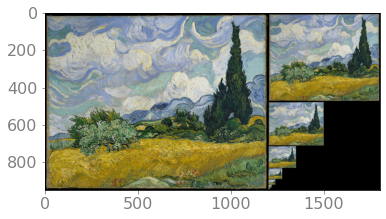

In [48]:
y, x = im.shape[:2]
height, width = im.shape[:2]
y1 = 0
x1 = 0
pyramid = np.zeros((y, int(1.5 * x), 3), np.float32)
pyramid[:y, :x, :] = im
x1 = x
for i in range(1, 8):
  imlevel = pyramid_level(im, i)
  y, x = imlevel.shape[:2]
  plt.imshow(pyramid)
  pyramid[y1:y1 + y, x1:x1 + x, :] = imlevel
  y1 += y
plt.imshow(convert(pyramid))

(-0.5, 1199.5, 949.5, -0.5)

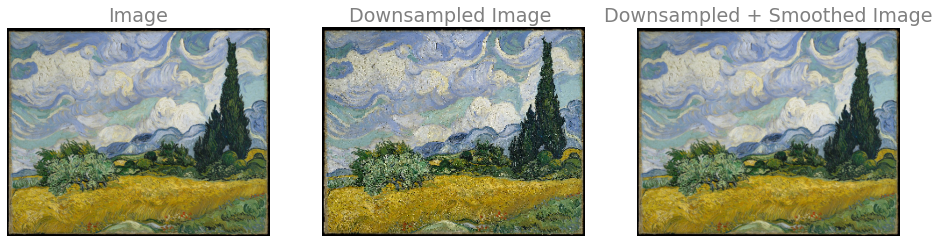

In [54]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=[16, 4])
ax0.set_title("Image")
ax1.set_title("Downsampled Image ")
ax2.set_title("Downsampled + Smoothed Image")

im0 = ax0.imshow(im)
im1 = ax1.imshow(new_im)
im2 = ax2.imshow(result)

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')

183.61111


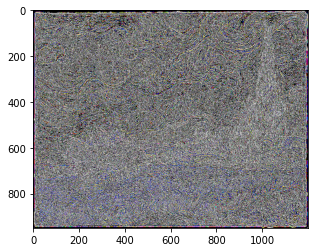

In [10]:
def lapplacian(im, level, kern=kern):
  return pyramid_level(im, level, kern) - upsample(pyramid_level(im, level + 1, kern), pyramid_level(im, level, kern).shape)
lap = lapplacian(im, 0)
plt.imshow(convert(lap))

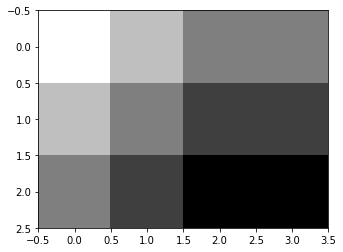

In [11]:
small = np.zeros((2, 2, 3), np.float32)
small[0, 0 , :] = 1
small[0, 1, :] = 0.5
small[1, 0, :] = 0.5
small[1, 1, :] = 0
test = np.zeros((4, 3, 3), np.float32)
test[::2, ::2, :] = small
plt.imshow(upsample(small, (3, 4, 3)))

183.61111


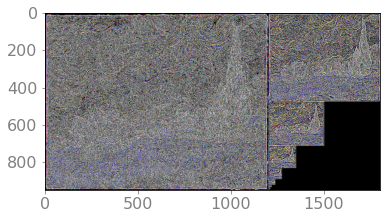

In [39]:
y, x = lap.shape[:2]
height, width = im.shape[:2]
y1 = 0
x1 = 0
pyramid = np.zeros((y, int(1.5 * x), 3), np.float32)
pyramid[:y, :x, :] = lap
x1 = x
for i in range(1, 8):
  lp = lapplacian(im, i)
  y, x = lp.shape[:2]
  pyramid[y1:y1 + y, x1:x1 + x, :] = lp
  y1 += y
plt.imshow(convert(pyramid))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


(474, 474, 3)


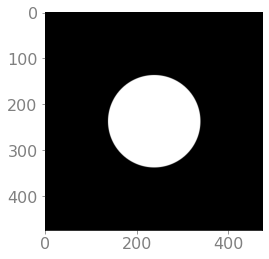

In [69]:
mask_size = sb.shape[0]//2
r = 100
ceny = 0
cenx = 0
x, y = np.ogrid[-mask_size:mask_size, -mask_size:mask_size]
dis = np.sqrt(np.square(x - cenx,) + np.square(y - ceny))
rad = np.array([r, r, r])[[..., None, None]]
cmask = 1 - (dis - rad).clip(0, 1)
cmask = np.transpose(cmask, (1, 2, 0))
plt.imshow(cmask)
print(cmask.shape)

In [31]:
from re import L
def greyscale(image):
  image = (0.3 * image[:, :, 0]) + (0.59 * image[:, :, 1]) + (0.11 * image[:, :, 2])
  return image.astype(np.float32)
def toplevel(im):
  h, w, _ = im.shape
  return int(np.ceil(np.log2(max(h, w))))
def collapse(im, level, kern = kern):
  top = np.zeros((1, 1, 3), dtype = np.float32)
  av = im.mean(axis=0).mean(axis=0)
  top[:, :, 0] = av[0]
  top[:, :, 1] = av[1]
  top[:, :, 2] = av[2]
  topval = toplevel(im)
  gi = top
  li = lapplacian(im, topval - 1)
  lev = 2
  for i in range(topval - level):
    gi = upsample(gi, li.shape) + li
    li = lapplacian(im, topval - lev)
    lev += 1
  return gi
def blend(im1, im2, mask, level=5):
  composite = np.multiply(im1, mask) + np.multiply(im2, mask)
  gp = pyramid_level(composite, level + 1)
  i = level
  while i >= 0:
    l1 = lapplacian(im1, i)
    l2 = lapplacian(im2, i)
    gmask = pyramid_level(mask, i)
    comp = np.multiply(gmask, l1) + np.multiply(1 - gmask, l2)
    gp = upsample(gp, comp.shape) + comp
    i -= 1
  return gp

In [70]:
composite = np.multiply(sb, cmask) + np.multiply(vb, 1-cmask)
blended1 = blend(sb, vb, cmask, toplevel(composite))
blended = convert(blended1)

304.4161071777344


(-0.5, 473.5, 473.5, -0.5)

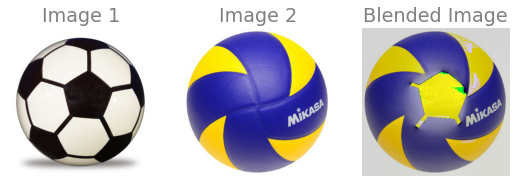

In [71]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=[9, 4])
ax0.set_title("Image 1")
ax1.set_title("Image 2")
ax2.set_title("Blended Image")

im0 = ax0.imshow(sb)
im1 = ax1.imshow(vb)
im2 = ax2.imshow(blended)

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')

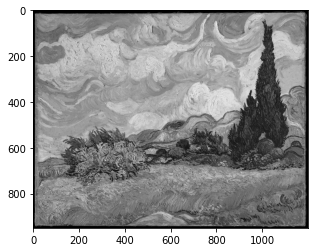

In [16]:
g = greyscale(im)
g = g/g.max()
plt.imshow(g, cmap="gray")

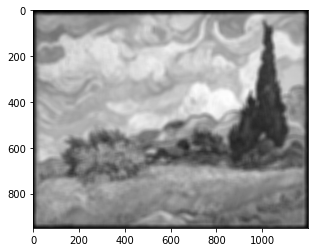

In [17]:
n = 20
skern = np.ones((n, n))/(n*n)
s_im = signal.convolve2d(g, skern, mode="same")
plt.imshow(s_im, cmap="gray")

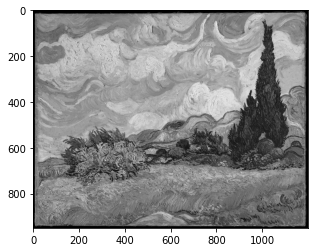

In [18]:
# Make a circular mask
N = 20
kernel_size = N
kernel_radius = (kernel_size) // 2
cen_x = 0
cen_y = 0

x, y = np.ogrid[-kernel_radius:kernel_radius, -kernel_radius:kernel_radius]
dist = (np.square(x-cen_y) + np.square(y-cen_x))**0.5 # shape (kernel_size, kernel_size)

rad = 2 # radius of circle

# let's create three kernels for the sake of example
radii = np.array([rad])#[...,None,None] # shape (num_radii, 1, 1)
circ_filter = 1 - (dist - radii).clip(0,1) # shape (num_radii, kernel_size, kernel_size)
circ_filter = circ_filter/circ_filter.sum()

circ_im = signal.convolve2d(g, circ_filter, mode='same')
plt.imshow(g, cmap="gray")

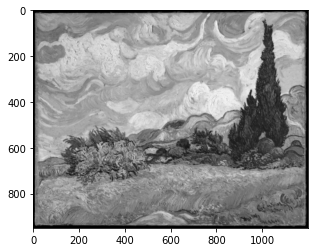

In [19]:
n = 20
w = 4
mid = n//2
dif = 3
filter = np.zeros((n, n))
filter[mid-w//2 - dif:mid+w//2 - dif, mid-w//2:mid+w//2] = 1
filter[mid-w]
filter[mid]
filter = filter/(w*w)

box = signal.convolve2d(g, filter, mode="same")
plt.imshow(box, cmap="gray")

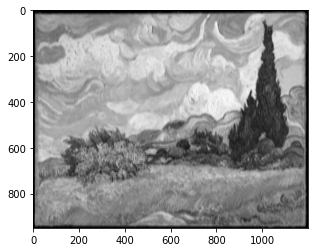

In [20]:
n = 20
w = 4
mid = n//2
dif = 3
filter2 = np.zeros((n, n))
filter2[mid-w//2 - dif:mid+w//2 - dif, mid-w//2:mid+w//2] = 1
filter2[dif + mid-w//2:mid+w//2 + dif, mid-w//2:mid+w//2] = 1
filter2[mid-w]
filter2[mid]
filter2 = filter2/(w*w)

box = signal.convolve2d(g, filter2, mode="same")
plt.imshow(box, cmap="gray")

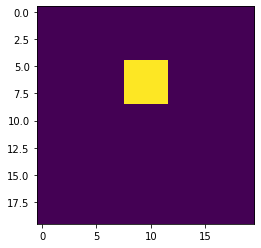

In [21]:
plt.imshow(filter)